# ECON408: Assignment 1

Jesse Perla, UBC

## Student Name/Number: Alexander (Thê) Quach (62679758)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [ ]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

: 

## Question 1

Create the following variables:

-   `D`: A floating point number with the value 10,000
-   `r`: A floating point number with the value 0.025 (i.e., 2.5% net
    interest rate)

Compute the present discounted value of a payment (`D`) made in `t`
years, assuming an interest rate of `r = 2.5%`. Save this value to a new
variable called `PDV` and print your output.

Hint: The formula is

$$
\text{PDV}(D, t) = \frac{D}{(1 + r)^t}
$$

For $t = 10$, calculate this PDV

In [2]:
D = 10000
r = 0.025

PDV = 0

for t in range(0,10)
    PDV = PDV + D/(1+r)^t

end

@show PDV

PDV = 97520.6393097094


97520.6393097094

## Question 2

Now assume that you have an asset the pays $D$ every year from
$t = 0,\ldots T$. Write code which will price this as the PDV of all
payoffs,

$$
P_T(D) = \sum_{t=0}^{T}\left(\frac{1}{1+r}
\right)^t D
$$

### Part (a)

Derive the analytic solution for the limit of
$P_{\infty}(D) \equiv \lim_{T\to \infty} P_T(D)$

(doubleclick here to modify. Add other cells as required. No need to
show all of your steps)

$$
P_{\infty}(D) = 410000
$$

### Part (b)

Plot the price as the horizon increases

-   On the x-axis plot $T = 1, \ldots 30$
-   On the y-axis plot $P_T(D)$ at that horizon
-   Plot a horizontal line at the asymptotic $P_{\infty}$ you calculated

infinite_payoffs(0, r, D) = 410000.0000000015
finite_payoffs(30, 0, r, D) = 219302.9259276123


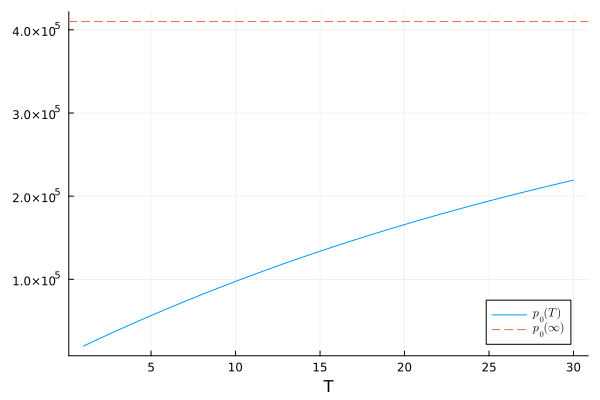

In [3]:
T_max = 30
T = 1:T_max
r = 0.025
D = 10_000

infinite_payoffs(g, r, y_0) = y_0 / (1 - (1 + g) * (1 + r)^(-1))
function finite_payoffs(T, g, r, y_0)
    G = 1 + g
    R = 1 + r
    return (y_0 * (1 - G^(T + 1) * R^(-T - 1))) / (1 - G * R^(-1))
end
@show infinite_payoffs(0, r, D)
@show finite_payoffs(30, 0, r, D);

p_finite = finite_payoffs.(T, 0, r, D)
p_infinite = infinite_payoffs(0, r, D)
plot(T, p_finite,xlabel = "T",
     label= L"p_0(T)", size = (600,400))
hline!([p_infinite], linestyle = :dash,
       label = L"p_0(\infty)")


## Question 3

Now instead of having constant dividends, assume that dividends follow
the process

$$\log D_{t+1} = \log D_t + \sigma w_{t+1}
$$

Where

-   $w_{t+1} \sim N(0,1)$ are IID unit random normals
-   $D_0 = 1.0$
-   $\sigma = 0.001$

### Part (a)

Write code to simulate a sequence of dividends with the process and
initial condition for $t = 0, \ldots T = 30$.

In [4]:
Random.seed!(1234)

T = 30
D_0 = 1.0
sigma = 0.001
# reminder, can draw from N(0,1) with randn()
# add code here for simulation

function simulate_dividends(sigma, T, D_0)
    D = zeros(T+1)
    W = zeros(T+1)
    W[2] = randn()
    D[1] = D_0
    D[2] = exp(log(D[1]) + sigma * W[2])
    for i in range(3, T+1)
        W[i] = randn()
        D[i] = exp(log(D[i-1]) + sigma * W[i])
    end
    return D
end

@show simulate_dividends(sigma, T, D_0)

simulate_dividends(sigma, T, D_0) = [1.0, 0.9996403357878619, 1.0007277442630573, 1.0003079373716475, 1.0010273272456311, 1.0014480945617465, 1.0007616661020697, 1.002820108282737, 1.003145970177075, 1.002840156335504, 1.003303269495972, 1.0024558787116535, 1.0033451623080312, 1.0033587816085847, 1.0034647936752132, 1.0029219222333297, 1.0022299041562068, 1.0012918401763824, 1.000673436735186, 1.0008255809237356, 0.9999258693570994, 1.0007406283579654, 1.0010393735191616, 0.9990661921774988, 0.999387683559535, 0.9996579406648468, 1.001237965103203, 1.0006191628954295, 0.9991503494628199, 0.9984216828072481, 0.9977866126699577]


31-element Vector{Float64}:
 1.0
 0.9996403357878619
 1.0007277442630573
 1.0003079373716475
 1.0010273272456311
 1.0014480945617465
 1.0007616661020697
 1.002820108282737
 1.003145970177075
 1.002840156335504
 1.003303269495972
 1.0024558787116535
 1.0033451623080312
 ⋮
 1.0008255809237356
 0.9999258693570994
 1.0007406283579654
 1.0010393735191616
 0.9990661921774988
 0.999387683559535
 0.9996579406648468
 1.001237965103203
 1.0006191628954295
 0.9991503494628199
 0.9984216828072481
 0.9977866126699577

### Part (b)

Plot three simulated sequences of dividends (i.e, the $D_{t}$ for
$t = 0, \ldots 30$) on the same graph with the shared x-axis.

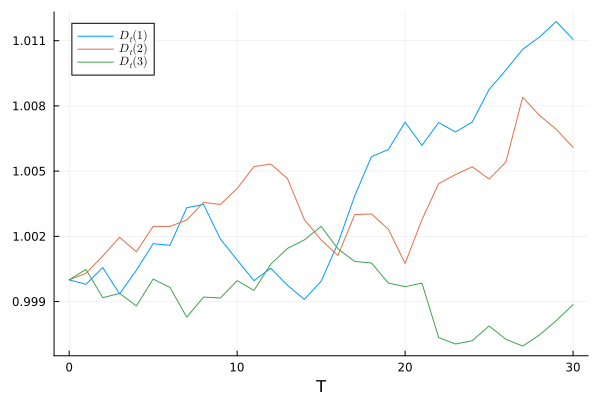

In [5]:
# add code here for plotting using your functions above

plot(0:T, simulate_dividends(sigma, T, D_0),xlabel = "T",
     label= L"D_t(1)", size = (600,400))
plot!(0:T, simulate_dividends(sigma, T, D_0),xlabel = "T",
     label= L"D_t(2)", size = (600,400))
plot!(0:T, simulate_dividends(sigma, T, D_0),xlabel = "T",
     label= L"D_t(3)", size = (600,400))

## Question 4

Using the simulated sequences of dividends from Question 3, calculate
the $P_T$ assuming perfect foresight (i.e., they were able to know the
sequence of $w_{t+1}$ even for $t \geq 0$). The formula remains the
same, except where $\{D_0, \ldots D_T\}$ is an argument which allows for
time-dependent dividends

$$
P_T(\{D_t\}_{t=0}^T) = \sum_{t=0}^{T}\left(\frac{1}{1+r}
\right)^t D_t
$$

All from the same $D_0 = 1.0$ initial condition calculate the
$P_T(\{D^n_t\}_{t=0}^T)$ for $n = 1, \ldots N$ simulated sequences of
dividends (i.e. see Question 3)

### Part (a)

Calculate the $P_T$ above given a dividend sequence

In [6]:
T = 30
D_0 = 1.0
sigma = 0.001
# add code here for calculating P_T and check results
r = 0.025

function P_t_div(T, D_0, sigma, r, simulated_dividends)
    dividends = simulated_dividends
    sum = 0

    for i in range(1,T+1)
        sum = sum + (1/(1+r))^i * dividends[i]
    end

    return sum

end


@show P_t_div(T, D_0, sigma, r, simulate_dividends(sigma, T, D_0))

P_t_div(T, D_0, sigma, r, simulate_dividends(sigma, T, D_0)) = 21.433380359710142


21.433380359710142

### Part (b)

Plot a histogram of the prices for $N = 100$ simulations and compare to
the deterministic case, which is nested if $\sigma = 0$. (Hint: see [our
lectures](https://jlperla.github.io/ECON408/lectures/intro.html#/more-plotting-examples)
or [Julia By
Example](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)
for more on histograms)

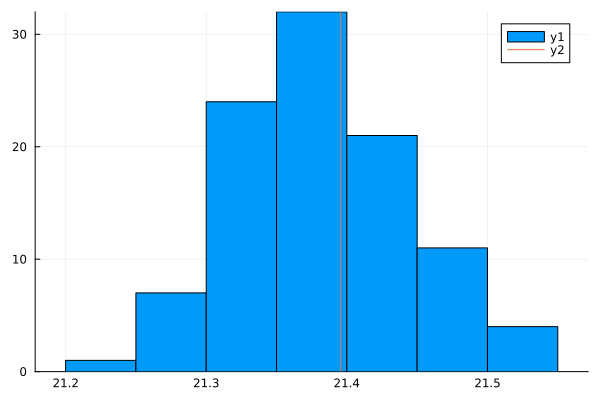

In [16]:
N = 100
# add code here for plotting using your functions above
# hint: use the `histogram` function

deterministic_div = simulate_dividends(0, T, D_0)
deterministic_sum = P_t_div(T, D_0, 0, r, deterministic_div)

price_dist_100 = zeros(N)

for i in 1:N
    simulated_dividends = simulate_dividends(sigma, T, D_0)
    price_dist_100[i] = P_t_div(T, D_0, sigma, r, simulated_dividends)
end

using Distributions
histogram(price_dist_100 ; size = (600,400))
vline!([deterministic_sum])